
#  Task 2 -To Explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.




# Importing the required libaries

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

# Dataset

In [2]:
student_data=pd.read_csv('student_data.csv')
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Finding if the data contains any Null value or not


In [13]:
student_data.isna().sum()

Hours     0
Scores    0
dtype: int64

Finding the Shape of the dataset

In [15]:
student_data.shape

(25, 2)

Checking all statics of the data

In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the Data

Distribution Plot of the features

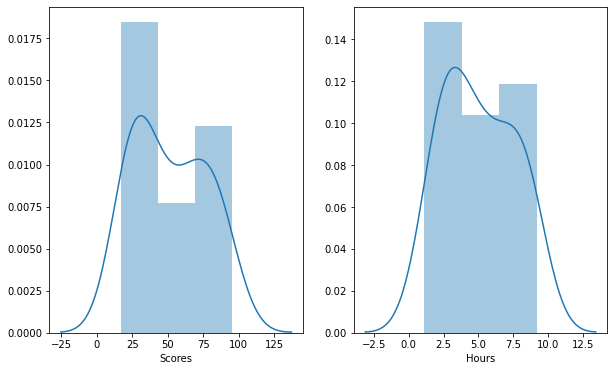

In [32]:
figure,(ax1,ax2)=plt.subplots(ncols=2)
figure.set_figheight(6)
figure.set_figwidth(10)
sns.distplot(student_data['Scores'],ax=ax1)
sns.distplot(student_data['Hours'],ax=ax2)

We can see that the data is normally distributed



# Now, we find Relation between the data

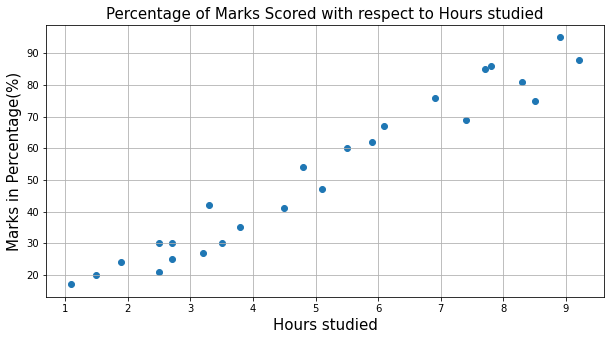

In [25]:
plt.figure(figsize=(10,5))
plt.title('Percentage of Marks Scored with respect to Hours studied',size=15)
plt.ylabel('Marks in Percentage(%)',size=15)
plt.xlabel('Hours studied',size=15)
plt.scatter(x=student_data['Hours'],y=student_data['Scores'])
plt.grid(True)

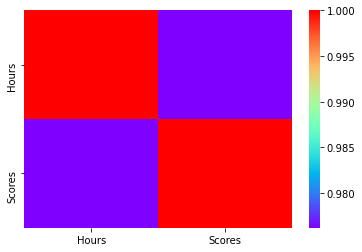

In [36]:
sns.heatmap(student_data.corr(),cmap='rainbow')

We can see the the feature 'Scores' and 'Hours' are linearly dependent

# Preparing the data for training

In [103]:
x=student_data.iloc[:,:-1].values
y=student_data.iloc[:,1].values           

Splitting the dependent and the independent values in 8 to 2 ratio for training and testing the model.

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('Spliting the Data Complete')

Spliting the Data Complete


In [78]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
print('Training the model complete')

Training the model complete


Plotting the regression line 

Slope: [9.91065648]
Intercept: 2.018160041434683


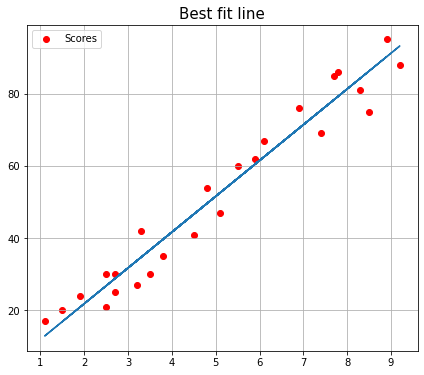

In [79]:
slope=linear_model.coef_
intercept=linear_model.intercept_
print('Slope:',slope)
print('Intercept:',intercept)

line=slope*x+intercept


plt.figure(figsize=(7,6))
plt.scatter(x,y,color='red',label='Scores')
plt.plot(x,line)
plt.title('Best fit line',size=15)
plt.legend()
plt.grid(True)
plt.show()

Predicting the test values using the model

In [80]:
y_predict=linear_model.predict(x_test)

In [82]:
predicted=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_predict})
predicted

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Comparing the actual values and predicted values

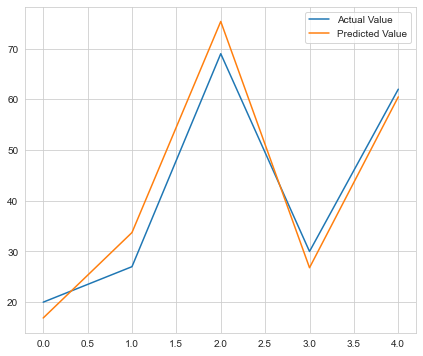

In [109]:
sns.set_style('whitegrid')
predicted.plot(kind='line',figsize=(7,6))

Testing with a new value

In [117]:
hour=[[9.25]]
predicted_score=linear_model.predict(hour)
print(f'Predicted Score: {predicted_score[0]} percent')

Predicted Score: 93.69173248737538 percent


# Evaluating the model

In [121]:
mae=mean_absolute_error(y_predict,y_test)
mse=mean_squared_error(y_predict,y_test)
r_score=r2_score(y_predict,y_test)
rmse=np.sqrt(mse)
print('Mean Absoulte Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-Squared:',r_score)

Mean Absoulte Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-Squared: 0.9546785947197246


# Made by Bishal Paul